# **Handwritten Digit Recognition**

## **Powered by Leonardo Cofone**

### **Import the data**

In [17]:
from tensorflow.keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

### **Preprocess the data**

In [18]:
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.metrics import Precision, Recall
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, f1_score

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

def preprocess(image, label):
    image = tf.cast(image, tf.float32) / 255.0         
    image = tf.stack([image, image, image], axis=-1)     
    image = tf.image.resize(image, [128, 128])         
    return image, label

train_ds = tf.data.Dataset.from_tensor_slices((x_train, y_train))
train_ds = train_ds.map(preprocess).shuffle(10000).batch(64).prefetch(tf.data.AUTOTUNE)

test_ds = tf.data.Dataset.from_tensor_slices((x_test, y_test))
test_ds = test_ds.map(preprocess).batch(64).prefetch(tf.data.AUTOTUNE)

### **Set the model**

In [19]:
base_model = tf.keras.applications.MobileNetV2(input_shape=(128, 128, 3), include_top=False, weights='imagenet')
base_model.trainable = True

for layer in base_model.layers[:-50]:
    layer.trainable = False

model = tf.keras.Sequential([
    base_model,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='softmax')
])

### **Train the model**

In [20]:
lr_scheduler = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.3, patience=2, min_lr=1e-6)
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
checkpoint = ModelCheckpoint('best_model.keras', monitor='val_loss', save_best_only=True, mode='min', verbose=1)
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy', Precision(), Recall()])

history = model.fit(train_ds,validation_data=test_ds,epochs=15,callbacks=[early_stopping, lr_scheduler, checkpoint])

Epoch 1/15


E0000 00:00:1750341968.333246     184 gpu_timer.cc:82] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
E0000 00:00:1750341968.530638     184 gpu_timer.cc:82] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.


937/938 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.9263 - loss: 0.2667 - precision_3: 0.9566 - recall_3: 0.9018

E0000 00:00:1750342001.950261     184 gpu_timer.cc:82] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
E0000 00:00:1750342002.147264     184 gpu_timer.cc:82] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.


938/938 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.9264 - loss: 0.2665 - precision_3: 0.9566 - recall_3: 0.9018
Epoch 1: val_loss improved from inf to 1.01851, saving model to best_model.keras
938/938 ━━━━━━━━━━━━━━━━━━━━ 71s 45ms/step - accuracy: 0.9264 - loss: 0.2664 - precision_3: 0.9566 - recall_3: 0.9019 - val_accuracy: 0.8314 - val_loss: 1.0185 - val_precision_3: 0.8339 - val_recall_3: 0.8294 - learning_rate: 0.0010
Epoch 2/15
937/938 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.9845 - loss: 0.0637 - precision_3: 0.9871 - recall_3: 0.9822
Epoch 2: val_loss improved from 1.01851 to 0.21225, saving model to best_model.keras
938/938 ━━━━━━━━━━━━━━━━━━━━ 29s 30ms/step - accuracy: 0.9845 - loss: 0.0637 - precision_3: 0.9871 - recall_3: 0.9822 - val_accuracy: 0.9727 - val_loss: 0.2123 - val_precision_3: 0.9729 - val_recall_3: 0.9724 - learning_rate: 0.0010
Epoch 3/15
937/938 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.9880 - loss: 0.0513 - precision_3: 0.9901 - recall_3: 0.

#### **Plot the train**

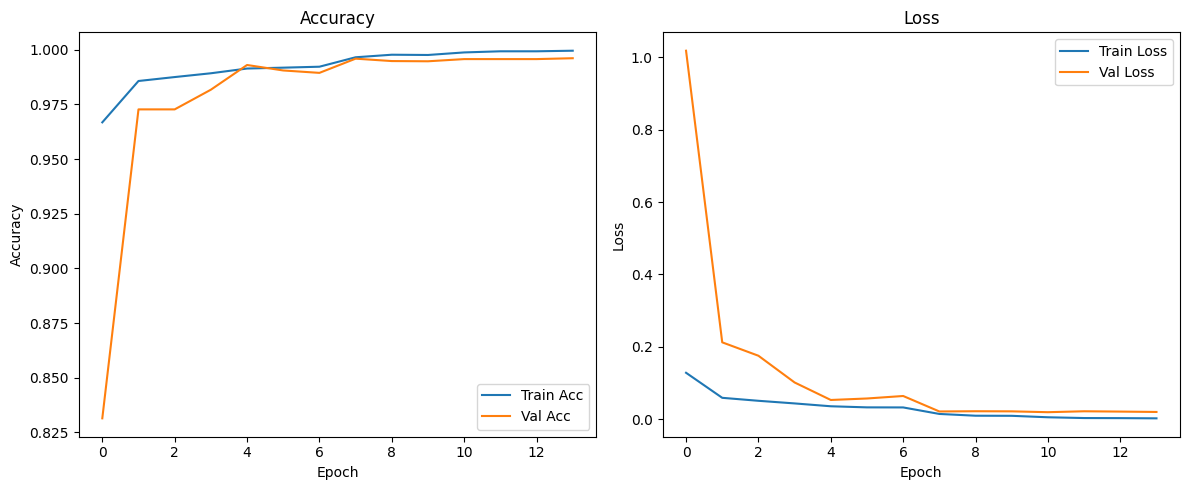

In [21]:
#PLOT TRAINING PROGRESS
def plot_history(history):
    plt.figure(figsize=(12, 5))
    
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Acc')
    plt.plot(history.history['val_accuracy'], label='Val Acc')
    plt.title('Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Val Loss')
    plt.title('Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

plot_history(history)

### **Test the model**

2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
2/2 ━━━━━━━━

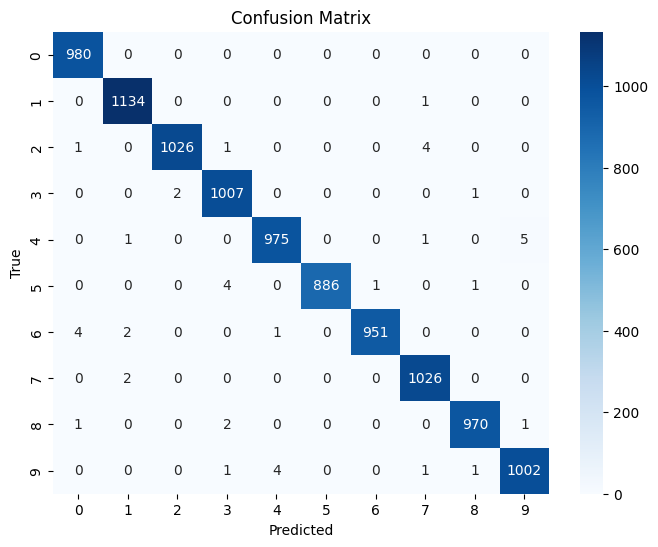

ROC AUC Score (macro): 1.0000
F1 Score (macro): 0.9957


In [22]:
y_true = []
y_pred_probs = []

for images, labels in test_ds:
    preds = model.predict(images)
    y_pred_probs.extend(preds)
    y_true.extend(labels.numpy())

y_true = np.array(y_true)
y_pred_probs = np.array(y_pred_probs)

y_pred_classes = np.argmax(y_pred_probs, axis=1)
y_true_classes = np.argmax(y_true, axis=1)

print(classification_report(y_true_classes, y_pred_classes))

cm = confusion_matrix(y_true_classes, y_pred_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

roc_auc = roc_auc_score(y_true, y_pred_probs, multi_class='ovr')
print(f"ROC AUC Score (macro): {roc_auc:.4f}")

f1 = f1_score(y_true_classes, y_pred_classes, average='macro')
print(f"F1 Score (macro): {f1:.4f}")


### **Set the model**

In [23]:
model.save('models/mnist_transfer_model.h5')